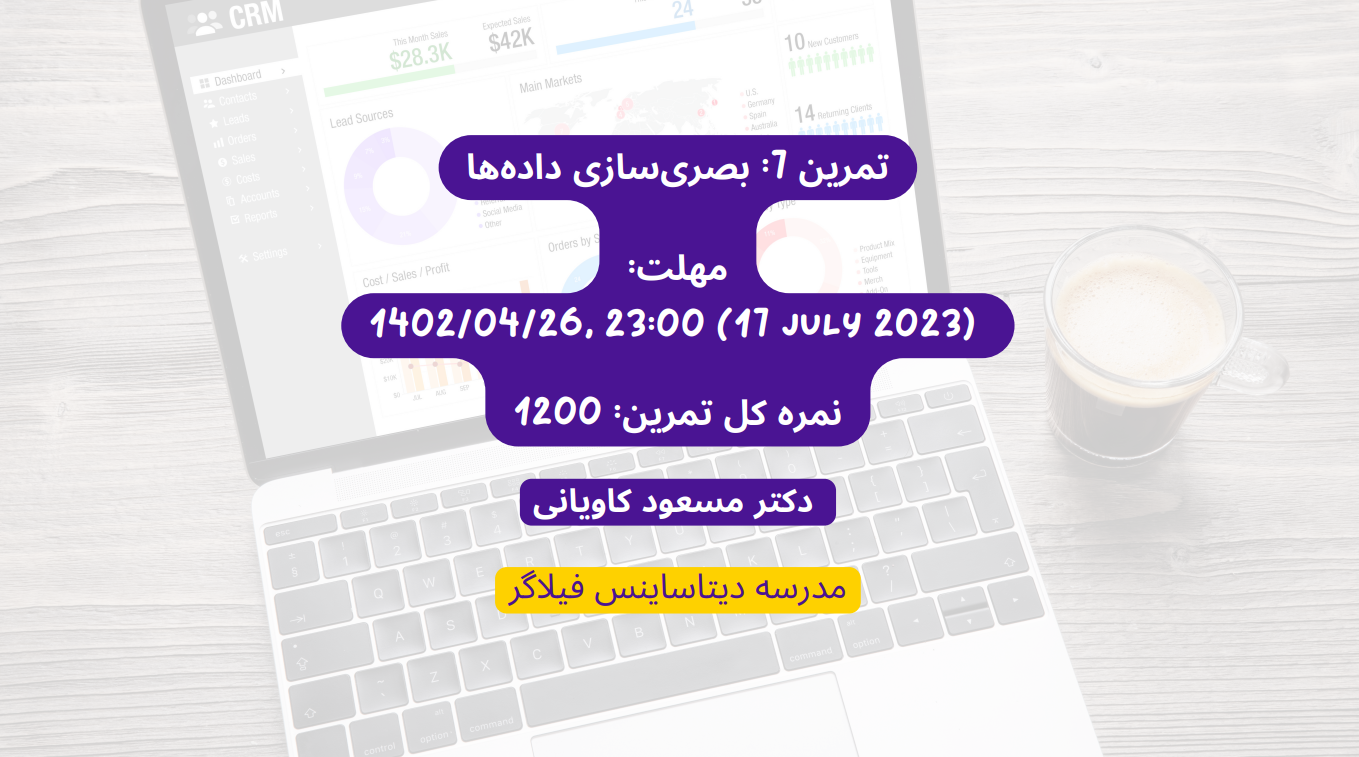
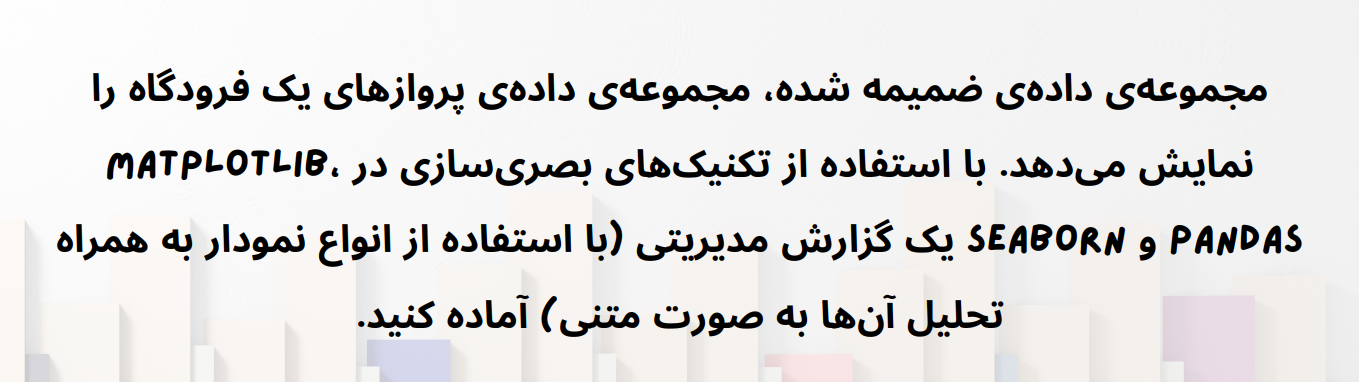

<div style="text-align: center; color: #810541	">
    <h1 style="font-family: 'Calibri', sans-serif; text-align: center; font-size: 50px; margin-top: 0; margin-bottom: 20px; font-weight: bold;">
        Exercise 7 
    </h1> 
</div>

The attached dataset displays the flight records of an airport. Using visual techniques in Matplotlib, Pandas, and Seaborn, prepare a management report (including various types of charts along with their textual analysis)

 <div style="background-color: #810541	; text-align: center;">
  <h1 style="color: white;"> 
    Importing Libriries
    </h1>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import os
import seaborn as sns

 <div style="background-color: #810541	; text-align: center;">
  <h1 style="color: white;"> 
    Reading Data
    </h1>
</div>

In [2]:
df = pd.read_csv ('flights.csv')

In [3]:
df.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


 <div style="background-color: #810541	; text-align: center;">
  <h1 style="color: white;"> 
    Data Cleaning
    </h1>
</div>

In [4]:
df.nunique()           # Number of unique values in each column

id                336776
year                   1
month                 12
day                   31
dep_time            1318
sched_dep_time      1021
dep_delay            527
arr_time            1411
sched_arr_time      1163
arr_delay            577
carrier               16
flight              3844
tailnum             4043
origin                 3
dest                 105
air_time             509
distance             214
hour                  20
minute                60
time_hour           6936
name                  16
dtype: int64

The "ID" column represents the indices, the "Year" column only pertains to the year 2013, and the "Flight" column which denotes the flight number, does not provide us with any useful information. Therefore, we can safely remove these columns from the dataset :

In [5]:
df.drop( {'id' , 'year','flight'} , axis = 1 , inplace = True)         # Removing useless columns
df.head()

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,1,1,517.0,515,2.0,830.0,819,11.0,UA,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,1,533.0,529,4.0,850.0,830,20.0,UA,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,1,1,542.0,540,2.0,923.0,850,33.0,AA,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   month           336776 non-null  int64  
 1   day             336776 non-null  int64  
 2   dep_time        328521 non-null  float64
 3   sched_dep_time  336776 non-null  int64  
 4   dep_delay       328521 non-null  float64
 5   arr_time        328063 non-null  float64
 6   sched_arr_time  336776 non-null  int64  
 7   arr_delay       327346 non-null  float64
 8   carrier         336776 non-null  object 
 9   tailnum         334264 non-null  object 
 10  origin          336776 non-null  object 
 11  dest            336776 non-null  object 
 12  air_time        327346 non-null  float64
 13  distance        336776 non-null  int64  
 14  hour            336776 non-null  int64  
 15  minute          336776 non-null  int64  
 16  time_hour       336776 non-null  object 
 17  name      

In [7]:
df.isnull().sum()                # Number of missing values in each column

month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64

Considering the small number of missing values (which are likely related to information on cancelled flights) compared to the total number of data points, we can remove them :

In [8]:
df.dropna(inplace = True)           # Removing Missing Values
df

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,1,1,517.0,515,2.0,830.0,819,11.0,UA,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,1,533.0,529,4.0,850.0,830,20.0,UA,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,1,1,542.0,540,2.0,923.0,850,33.0,AA,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,N354JB,JFK,SYR,41.0,209,22,45,2013-09-30 22:00:00,JetBlue Airways
336766,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,N281JB,JFK,BUF,52.0,301,22,50,2013-09-30 22:00:00,JetBlue Airways
336767,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,N346JB,JFK,ROC,47.0,264,22,46,2013-09-30 22:00:00,JetBlue Airways
336768,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,N565JB,JFK,BOS,33.0,187,22,55,2013-09-30 22:00:00,JetBlue Airways


 <div style="background-color: #810541	; text-align: center;">
  <h1 style="color: white;"> 
    Visualization
    </h1>
</div>

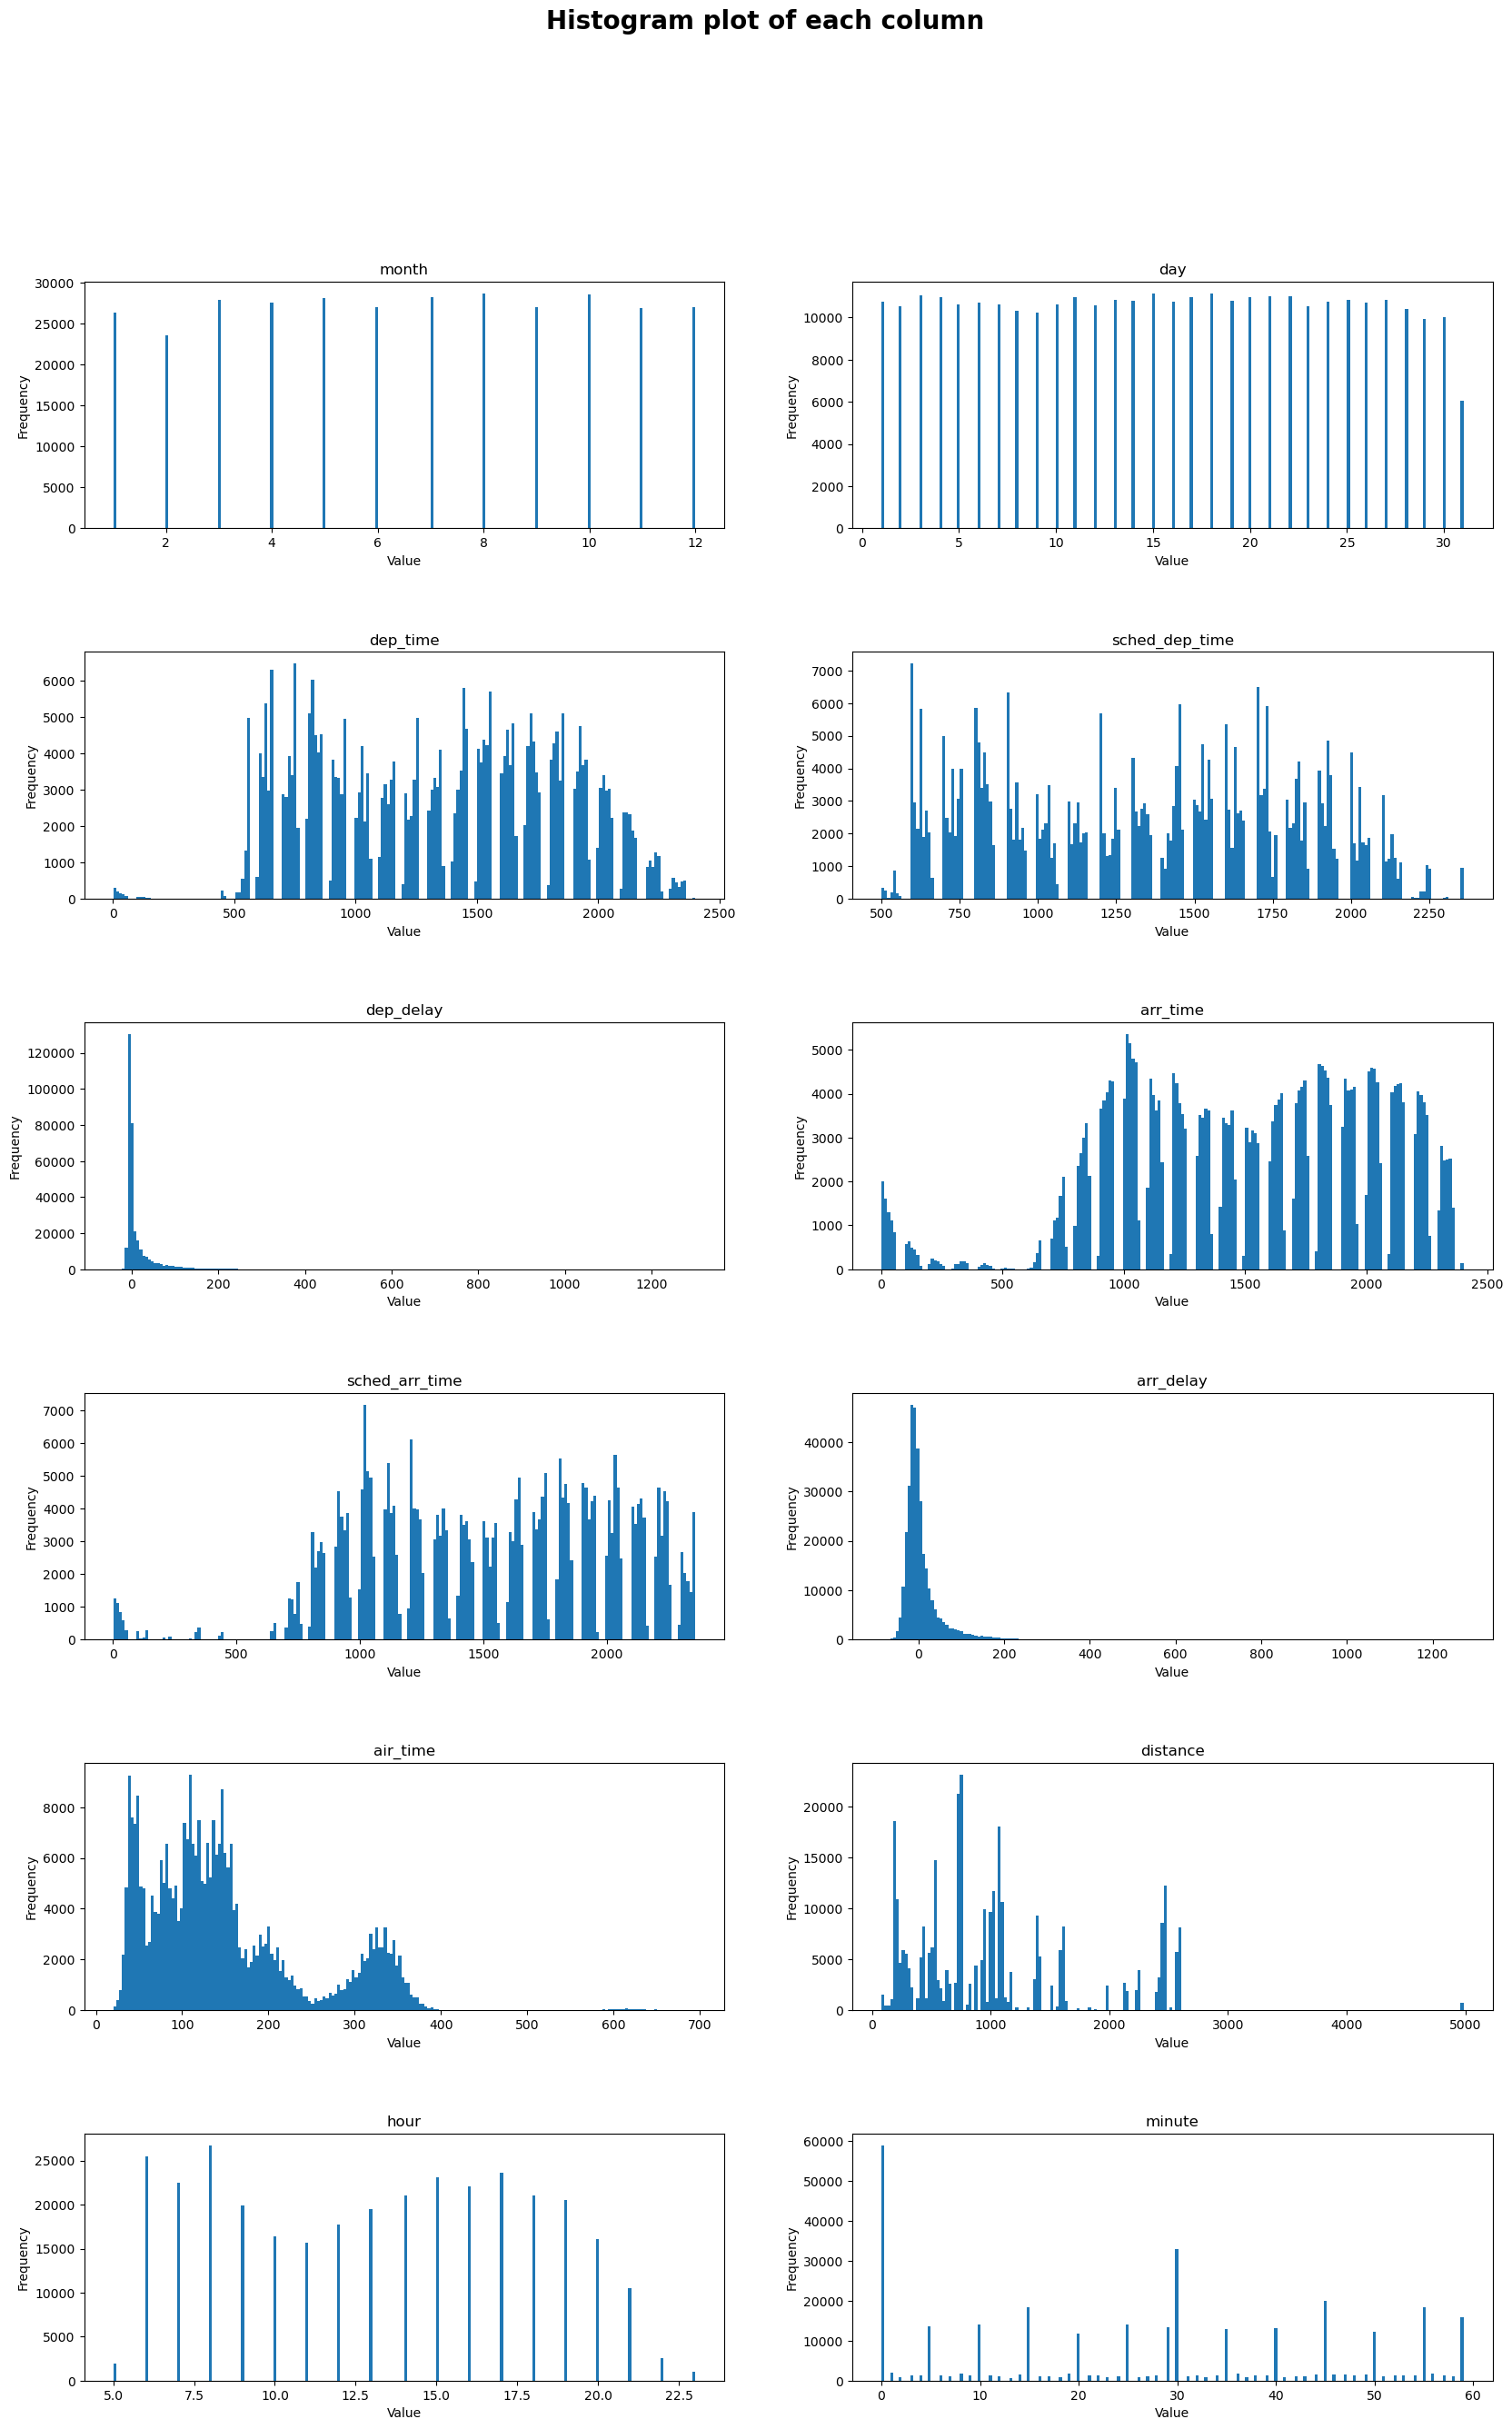

In [136]:
fig = plt.figure(figsize=(20, 30))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Histogram plot of each column", fontsize=20, fontweight='bold')

# Creat histogram for each columns in dataset
for n, col in enumerate(num_df.columns):
    ax = plt.subplot(6, 2, n + 1)
    plt.hist(num_df[col] , bins=200)

    ax.set_title(col)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

plt.show()

Based on the histogram plots, it seems that the data does not follow a normal distribution, and the compression of the "arr_delay" and "dep_delay" plots indicates the presence of records with much higher delays than the normal limit.

<div style="border: 3px solid #6A0DAD; padding: 10px; display: inline-block; background-color: #E3E4FA;">
    <h1 style="font-family: 'Calibri', sans-serif; text-align: left; font-size:30px; margin-top: 0; margin-bottom: 5px; font-weight: bold; color: #6A0DAD;">
        Flights per Month :
    </h1> 
</div>

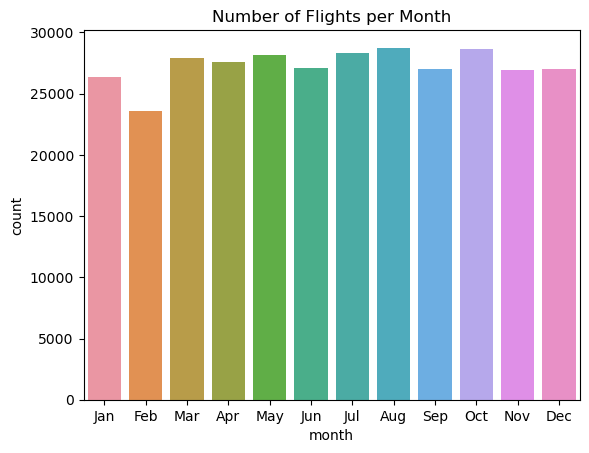

In [9]:
month_count = df['month'].value_counts()
plt.title('Number of Flights per Month')
ax = sns.countplot(x = df['month'])

# Set the x-tick labels to the names of the months
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

ax.set_xticklabels(month_names);

The fewest flights occurred in February, while the most flights took place in July and October.

In [10]:
month_dep_delay = df.groupby(['month'], as_index=False).agg({'dep_delay':'mean'}).round(2)
month_arr_delay = df.groupby(['month'], as_index=False).agg({'arr_delay':'mean'}).round(2)

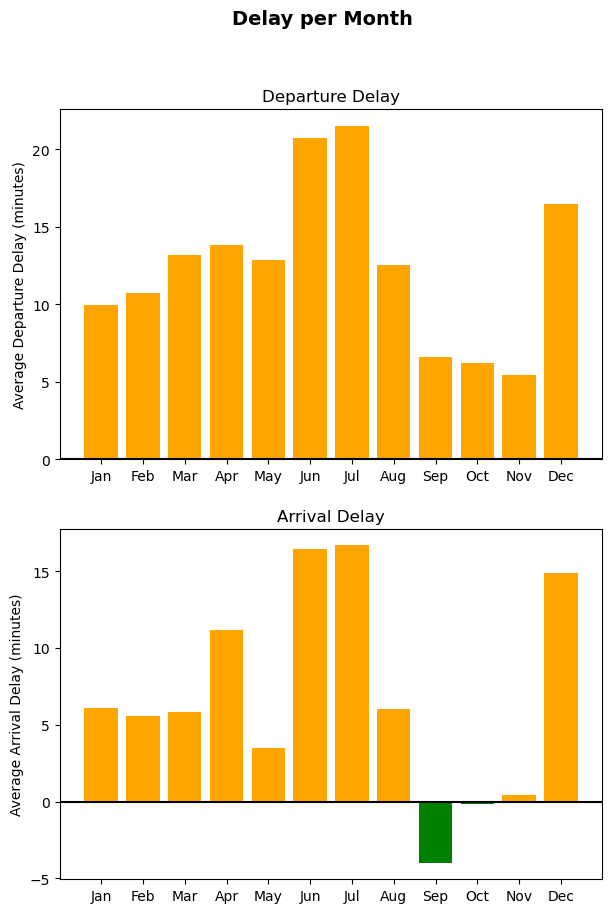

In [118]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(7,10), 
                                gridspec_kw={'hspace': 0.2})

# Seprate positive and negative values
arr_pos_bars = month_arr_delay['arr_delay'] > 0 
arr_neg_bars = month_arr_delay['arr_delay'] < 0
dep_pos_bars = month_dep_delay['dep_delay'] > 0
dep_neg_bars = month_dep_delay['dep_delay'] < 0 

# Create the first chart with departure delay
ax1.bar(month_dep_delay[dep_pos_bars]['month'], month_dep_delay[dep_pos_bars]['dep_delay'], color='orange')
ax1.bar(month_dep_delay[dep_neg_bars]['month'], month_dep_delay[dep_neg_bars]['dep_delay'], color='green')
ax1.set(title='Departure Delay', ylabel='Average Departure Delay (minutes)')
ax1.set_xticks(np.arange(1,13,1))
ax1.set_xticklabels(month_names)
ax1.axhline(0, color='black', linestyle='-')

# Create the second chart with arrival delay
ax2.bar(month_arr_delay[arr_pos_bars]['month'], month_arr_delay[arr_pos_bars]['arr_delay'], color='orange')
ax2.bar(month_arr_delay[arr_neg_bars]['month'], month_arr_delay[arr_neg_bars]['arr_delay'], color='green')
ax2.set(title='Arrival Delay', ylabel='Average Arrival Delay (minutes)')
ax2.set_xticks(np.arange(1,13,1))
ax2.set_xticklabels(month_names)
ax2.axhline(0, color='black', linestyle='-')

fig.suptitle('Delay per Month', fontsize=14, fontweight='bold');

The highest average flight delay of approximately 23 minutes was observed in the months of July and June, with flights arriving about 18 minutes late on average compared to the scheduled time. On the other hand, the lowest average delay was observed in November, October, and September, with a delay of around 7 minutes. In September, flights arrived on average 4 minutes earlier than the scheduled time.

<div style="border: 3px solid #6A0DAD; padding: 10px; display: inline-block; background-color: #E3E4FA;">
    <h1 style="font-family: 'Calibri', sans-serif; text-align: left; font-size:30px; margin-top: 0; margin-bottom: 5px; font-weight: bold; color: #6A0DAD;">
        Flights per Day :
    </h1> 
</div>

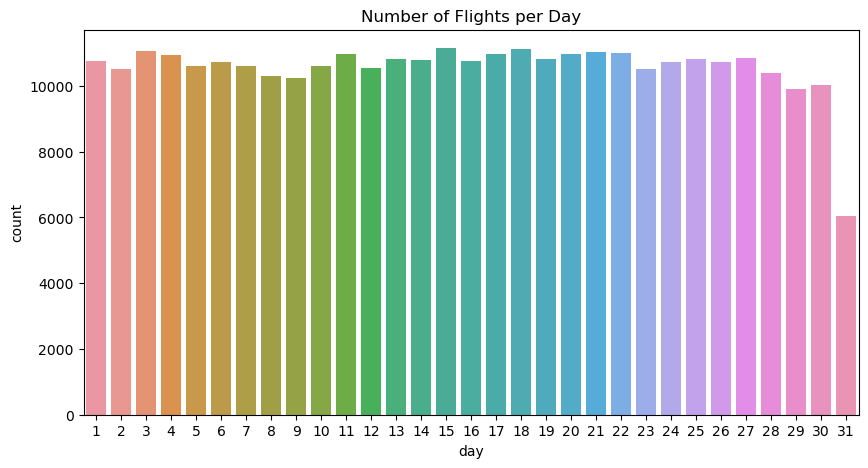

In [12]:
day_counts = df['day'].value_counts()
plt.figure (figsize = (10 , 5))
sns.countplot(x = df['day'] )
plt.title('Number of Flights per Day');

The highest number of flights are recorded on the 18th and 15th days of each month, while the lowest number of flights are recorded on the last days of the month (29th, 30th, and 31st). Of course, the lower number of flights on the 31st day is due to the fact that there are only 6 months with 31 days in a year.

In [13]:
day_dep_delay = df.groupby(['day'], as_index = False).agg({'dep_delay':'mean'}).round(2)
day_arr_delay = df.groupby(['day'], as_index = False).agg({'arr_delay':'mean'}).round(2)

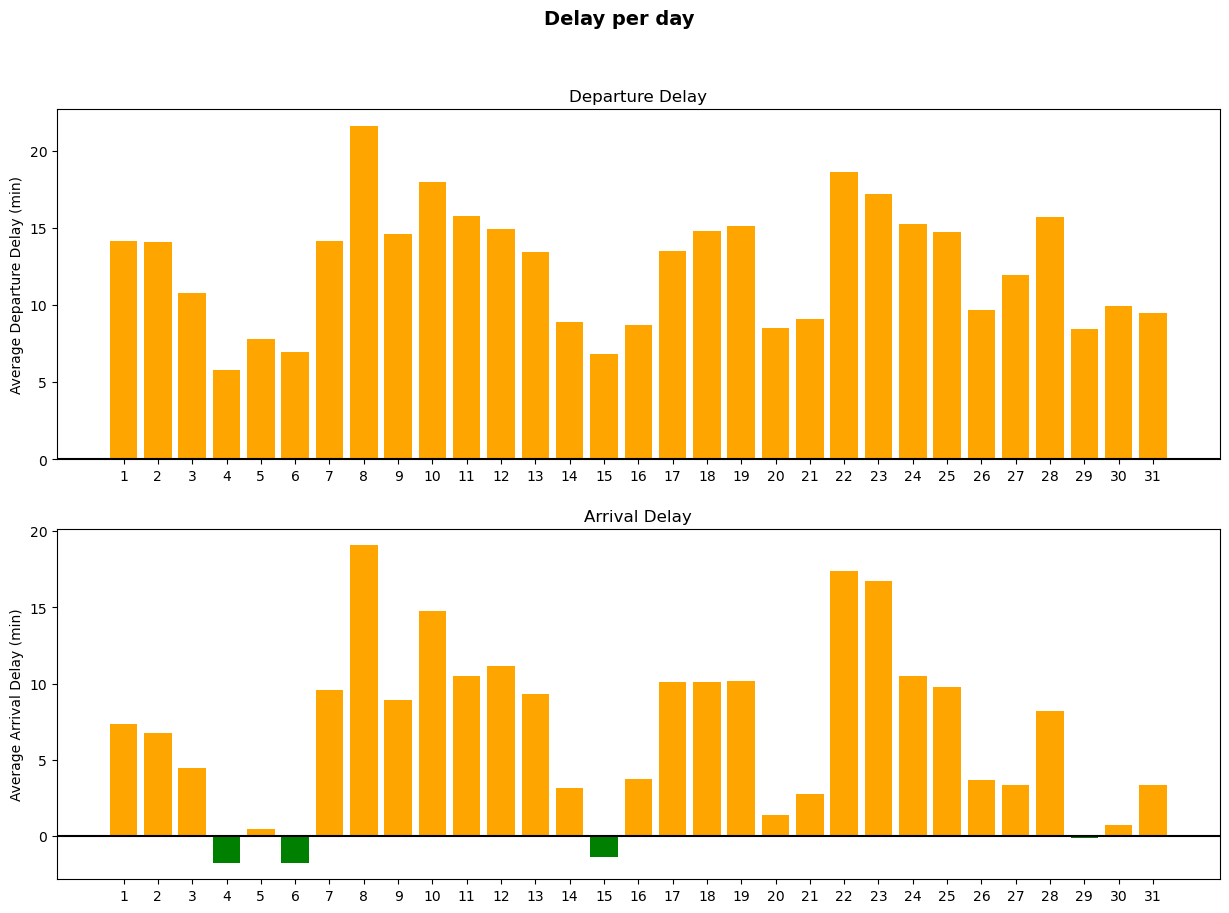

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (15,10), 
                                gridspec_kw={'hspace': 0.2})

# Seprate positive and negative values
arr_pos_bars = day_arr_delay['arr_delay'] > 0 
arr_neg_bars = day_arr_delay['arr_delay'] < 0
dep_pos_bars = day_dep_delay['dep_delay'] > 0
dep_neg_bars = day_dep_delay['dep_delay'] < 0 

# Create the first chart with departure delay
ax1.bar(day_dep_delay[dep_pos_bars]['day'], day_dep_delay[dep_pos_bars]['dep_delay'], color = 'orange')
ax1.bar(day_dep_delay[dep_neg_bars]['day'], day_dep_delay[dep_neg_bars]['dep_delay'], color = 'green')
ax1.set(title = 'Departure Delay', ylabel = 'Average Departure Delay (min)')
ax1.set_xticks(np.arange(1,32,1))
ax1.axhline(0, color ='black', linestyle = '-')

# Create the second chart with arrival delay
ax2.bar(day_arr_delay[arr_pos_bars]['day'], day_arr_delay[arr_pos_bars]['arr_delay'], color = 'orange')
ax2.bar(day_arr_delay[arr_neg_bars]['day'], day_arr_delay[arr_neg_bars]['arr_delay'], color = 'green')
ax2.set(title = 'Arrival Delay', ylabel = 'Average Arrival Delay (min)') 
ax2.set_xticks(np.arange(1,32,1))
ax2.axhline(0, color = 'black', linestyle = '-')

fig.suptitle('Delay per day', fontsize = 14, fontweight = 'bold');

On average, the highest delay of around 22 minutes occurred on the 8th day of the month, while the lowest delay of around 6 minutes occurred on the 4th day of the month. On the 4th, 6th, and 15th days of each month, flights arrived about 1.5 minutes earlier than scheduled on average.

<div style="border: 3px solid #6A0DAD; padding: 10px; display: inline-block; background-color: #E3E4FA;">
    <h1 style="font-family: 'Calibri', sans-serif; text-align: left; font-size:30px; margin-top: 0; margin-bottom: 5px; font-weight: bold; color: #6A0DAD;">
        Flight Time Vs Delay :
    </h1> 
</div>

In [15]:
df['hour'].unique()

array([ 5,  6,  7,  8, 18,  9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21,
       22, 23], dtype=int64)

In [60]:
time_delay = df.groupby(['hour'], as_index = False).agg({'dep_delay':'mean','arr_delay':'mean'}).round(2)

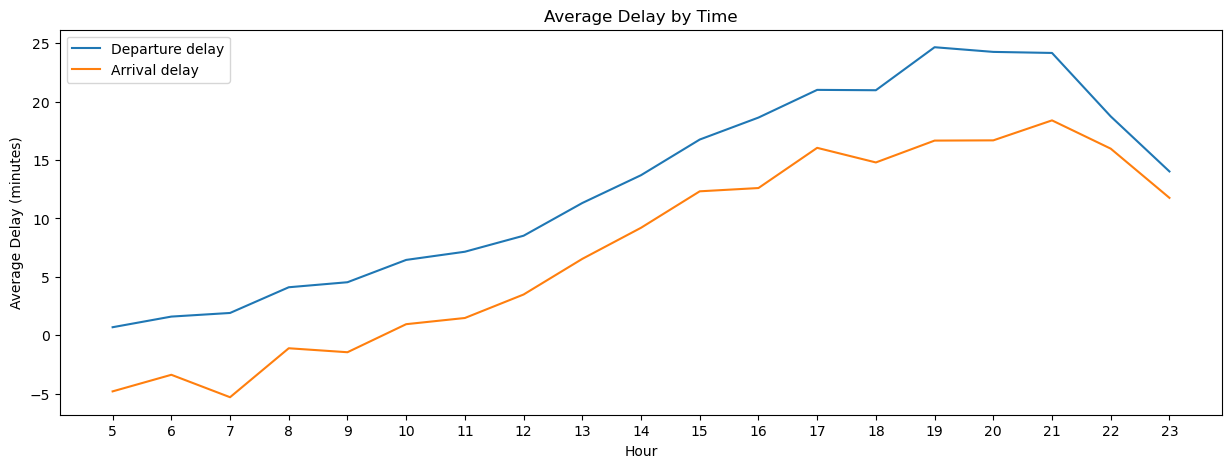

In [61]:
fig, ax = plt.subplots(figsize=(15,5))

# Creat plots
ax.plot(time_delay['hour'], time_delay['dep_delay'], label='Departure delay')
ax.plot(time_delay['hour'], time_delay['arr_delay'], label='Arrival delay')

# Confiquration
ax.set_title('Average Delay by Time')
ax.set_xlabel('Hour')
ax.set_ylabel('Average Delay (minutes)')
ax.set_xticks(np.arange(5,24,1))

ax.legend();

Flights usually operate from 5 AM to 11 PM, and there are no flights between 11 PM and 5 AM. In general, as the flight approaches the end of the day, which is around midnight, the delay increases. The highest delay has been observed between 7 and 9 PM, and the delay decreases afterwards.

<div style="border: 3px solid #6A0DAD; padding: 10px; display: inline-block; background-color: #E3E4FA;">
    <h1 style="font-family: 'Calibri', sans-serif; text-align: left; font-size:30px; margin-top: 0; margin-bottom: 5px; font-weight: bold; color: #6A0DAD;">
        Origin :
    </h1> 
</div>

In [43]:
origin_counts = df['origin'].value_counts()
origin_counts

origin
EWR    117127
JFK    109079
LGA    101140
Name: count, dtype: int64

In [35]:
origin_delay = df.groupby(['origin'], as_index=False).agg({'arr_delay':'mean','dep_delay':'mean'}).round(2)
origin_delay

,origin,arr_delay,dep_delay
0,EWR,9.11,15.01
1,JFK,5.55,12.02
2,LGA,5.78,10.29


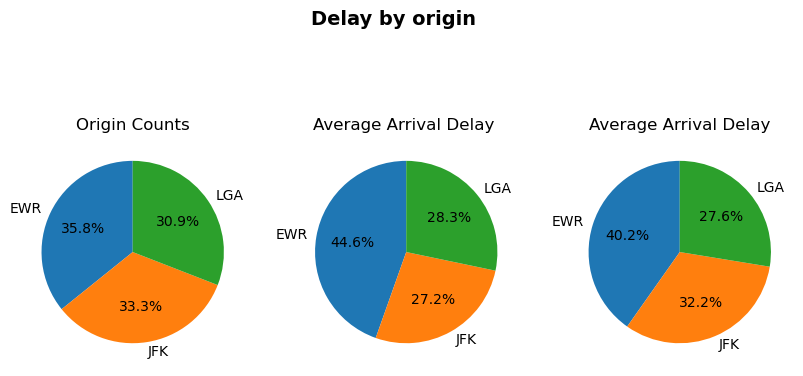

In [41]:
# Create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

# Create the first pie chart with origin counts
ax1.pie(origin_counts, labels = origin_delay['origin'], startangle = 90, autopct = '%1.1f%%')
ax1.set_title('Origin Counts')

# Create the second pie chart with average arrival delay by origin
ax2.pie(origin_delay['arr_delay'], labels = origin_delay['origin'], startangle=90, autopct='%1.1f%%')
ax2.set_title('Average Arrival Delay ')

# Create the second pie chart with average arrival delay by origin
ax3.pie(origin_delay['dep_delay'], labels = origin_delay['origin'], startangle=90, autopct='%1.1f%%')
ax3.set_title('Average Arrival Delay')

fig.suptitle('Delay by origin', fontsize = 14, fontweight = 'bold');

All flights are operated from three airports: EWR, LGA, and JFK, and the number of flights from these three airports is approximately equal. However, on average, the percentage of delays in flights departing from EWR airport is higher than the other two airports.

<div style="border: 3px solid #6A0DAD; padding: 10px; display: inline-block; background-color: #E3E4FA;">
    <h1 style="font-family: 'Calibri', sans-serif; text-align: left; font-size:30px; margin-top: 0; margin-bottom: 5px; font-weight: bold; color: #6A0DAD;">
        Carrier :
    </h1> 
</div>

In [57]:
carrier_delay = df.groupby(['carrier']).agg({'dep_delay':'mean','arr_delay':'mean'}).round(2)

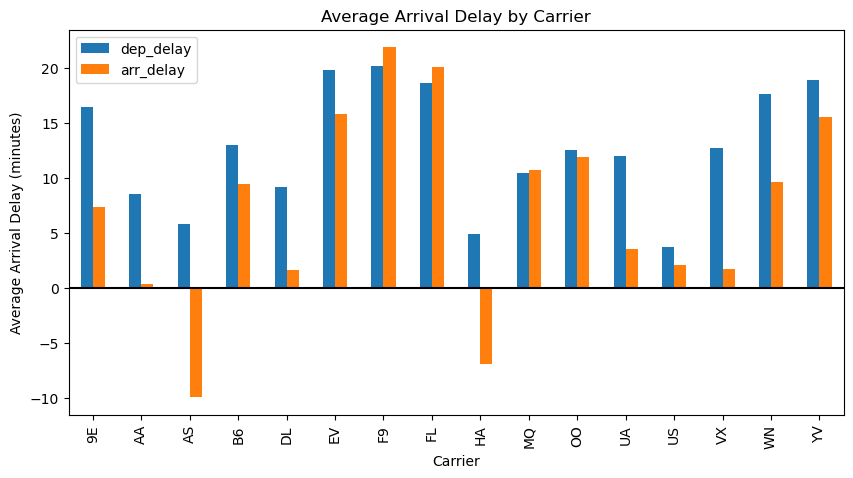

In [55]:
ax = carrier_delay.plot(kind='bar', figsize=(10,5))

# Add a horizontal line at y=0 
ax.axhline(0, color = 'black', linestyle = '-')

# Set the title and axis labels
ax.set_title('Average Arrival Delay by Carrier')
ax.set_xlabel('Carrier')
ax.set_ylabel('Average Arrival Delay (minutes)');


As indicated in the chart, the highest departure and arrival delays were associated with F9, FL, and EV airlines. In contrast, the lowest delay rates were related to US, HA, and AS airlines. On average, the flights of AS and HA airlines arrived at their destination about 10 and 7 minutes earlier than the predicted time, respectively.

<div style="border: 3px solid #6A0DAD; padding: 10px; display: inline-block; background-color: #E3E4FA;">
    <h1 style="font-family: 'Calibri', sans-serif; text-align: left; font-size:30px; margin-top: 0; margin-bottom: 5px; font-weight: bold; color: #6A0DAD;">
        Correlation of variables :
    </h1> 
</div>

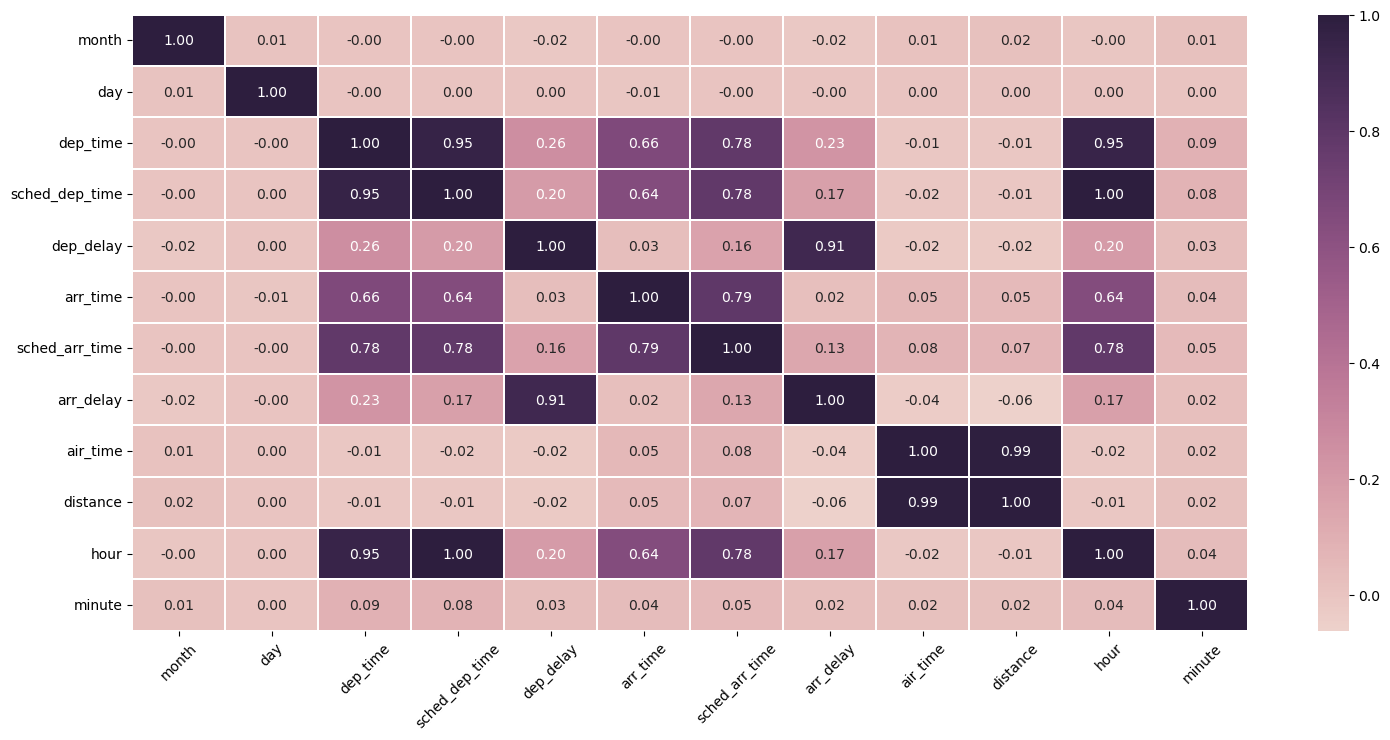

In [117]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", linewidth=.3, cmap=sns.cubehelix_palette(as_cmap=True))
plt.xticks(rotation = 45);

The above plot shows the correlation between the "arr_delay" and "dep_delay" columns with each other, as well as the correlation between the "distance" and "air_time" columns.

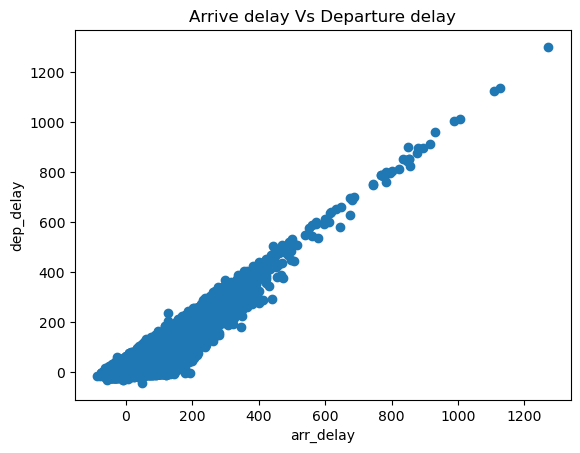

In [139]:
plt.scatter(df['arr_delay'] , df['dep_delay'])
plt.title ('Arrive delay Vs Departure delay')
plt.xlabel('arr_delay')
plt.ylabel('dep_delay');

As it is obvious in this plot, the relationship between departure delay and arrival delay is a completely linear and direct relationship. Therefore, given the type of relationship and the high percentage of correlation, it can be concluded that departure delay has a significant effect on arrival delay, and this is one of the reasons for it.

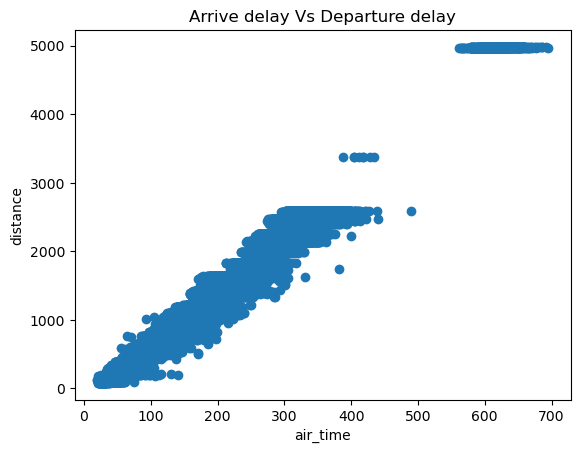

In [142]:
plt.scatter(df['air_time'] , df['distance'])
plt.title ('Arrive delay Vs Departure delay')
plt.xlabel('air_time')
plt.ylabel('distance');

As seen in the plot, the "air_time" has increased with the increase in "distance", so naturally the distance has an effect on the duration of the flight.